# Importing the necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
# Get the base directory of the project
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Construct the correct path to the dataset
file_path = os.path.join(base_dir, 'dataset', 'iphone.csv')

# Basic analysis


In [3]:
print("Dataset information:")
df = pd.read_csv(file_path)
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [4]:
# Display the first 5 rows of the dataset
df.head()


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [5]:
# Display the number of unique values for each column
df.nunique()

productAsin             7
country                 7
date                  789
isVerified              2
ratingScore             5
reviewTitle          2018
reviewDescription    2297
reviewUrl            2460
reviewedIn           1255
variant                86
variantAsin            99
dtype: int64

In [6]:
# Display the number of missing values for each column
df.isnull().sum()


productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [7]:
print("Statistical information:")
df.describe()


Statistical information:


,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# Detailed Data Analysis


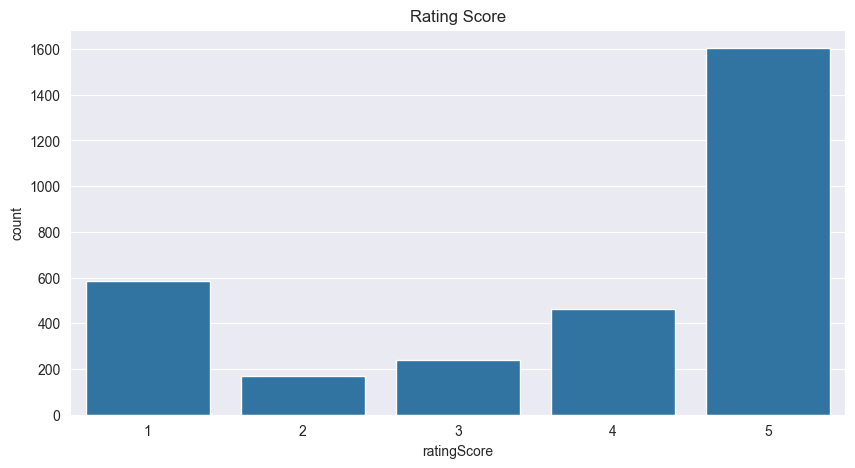

In [8]:
# using matplotlib for visualization

# visualise the field ratingScore
# visualise each score with different color

plt.figure(figsize=(10,5))
sns.countplot(x='ratingScore', data=df)
plt.title('Rating Score')
plt.show()


In [9]:
# checking amount of data available for each country

data_per_country = df.groupby('country').size()
print(data_per_country)

country
Canada                     4
Egypt                      1
India                   2229
Japan                    158
Mexico                    11
United Arab Emirates      80
United States            579
dtype: int64


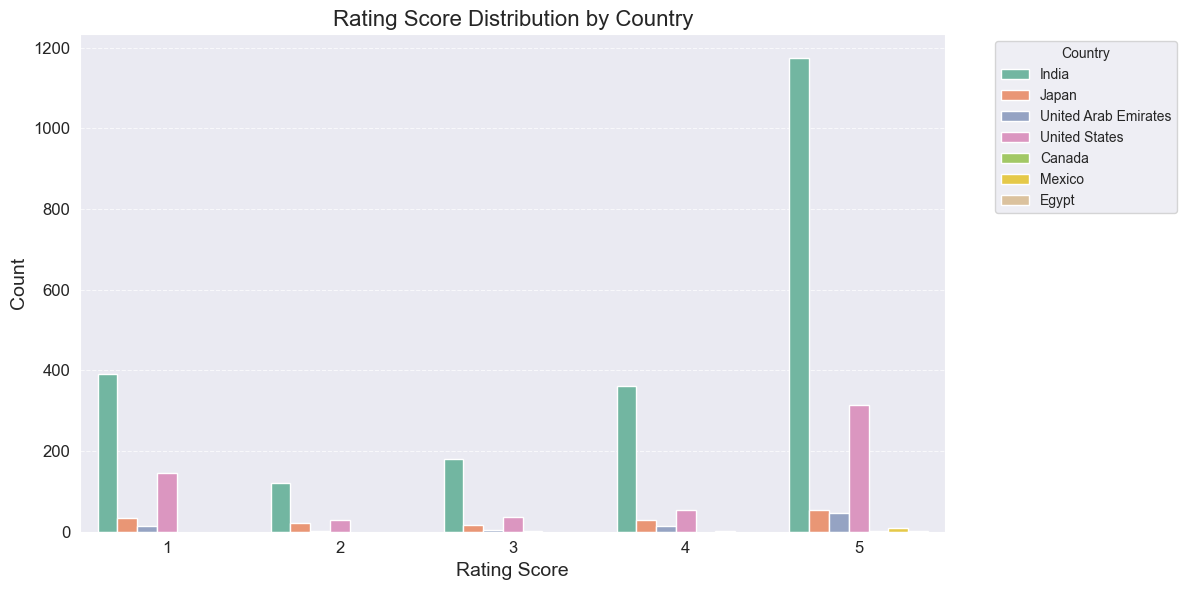

In [11]:
# visualise the distribution of ratingScore for each country

plt.figure(figsize=(12, 6))
sns.countplot(x='ratingScore', hue='country', data=df, palette='Set2')
plt.title('Rating Score Distribution by Country', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
